**ABSTRACT**

The Customer Shopping Preferences Dataset offers valuable insights into consumer behavior and purchasing patterns. Understanding customer preferences and trends is critical for businesses to tailor their products, marketing strategies, and overall customer experience. This dataset captures a wide range of customer attributes including age, gender, purchase history, preferred payment methods, frequency of purchases, and more. Analyzing this data can help businesses make informed decisions, optimize product offerings, and enhance customer satisfaction. The dataset stands as a valuable resource for businesses aiming to align their strategies with customer needs and preferences.



**DATASET**

This dataset encompasses various features related to customer shopping preferences, gathering essential information for businesses seeking to enhance their understanding of their customer base. The features include customer age, gender, purchase amount, preferred payment methods, frequency of purchases, and feedback ratings. Additionally, data on the type of items purchased, shopping frequency, preferred shopping seasons, and interactions with promotional offers is included. With a collection of 3900 records, this dataset serves as a foundation for businesses looking to apply data-driven insights for better decision-making and customer-centric strategies.

Customer ID - Unique identifier for each customer.

Age - Age of the customer.

Gender - Gender of the customer (Male/Female).

Item Purchased - The item purchased by the customer.

Category - Category of the item purchased.

Purchase Amount (USD) - The amount of the purchase in USD.

Location - Location where the purchase was made.

Size - Size of the purchased item.

Color - Color of the purchased item.

Season - Season during which the purchase was made.

Review Rating - Rating given by the customer for the purchased item.

Subscription Status - Indicates if the customer has a subscription (Yes/No).

Shipping Type - Type of shipping chosen by the customer.

Discount Applied - Indicates if a discount was applied to the purchase (Yes/No).

Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No).

Previous Purchases - Number of previous purchases made by the customer.

Payment Method - Customer's most preferred payment method.

Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).

**Importing required Libraries and H20 Initialization**


Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.



In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [ ]:
min_mem_size=6
run_time=222


In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)


5


In [ ]:
pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,28 mins 14 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_pdqz49
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Once H2O is initialized, in the below code we are importing the data into a H2o dataframe.

In [ ]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/chetanpw98/Chetan_Warad_002817179_Data-science-Assignment/main/shopping_trends.csv"
df = h2o.import_file(path = url)
dff = pd.read_csv('https://raw.githubusercontent.com/chetanpw98/Chetan_Warad_002817179_Data-science-Assignment/main/shopping_trends.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
dff.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
dff.shape

(3900, 19)

3900 rows X 19 columns

STUDYING THE DATA

In [ ]:
dff.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


**OBSERVATION:**

count: There are 3,900 entries (or rows) for the Customer ID.
mean: The average (or arithmetic mean) value of the Customer IDs is 1,950.50.
std: The standard deviation (which measures the amount of variation or dispersion) is 1,125.98. Given this is an ID field, this value might not be particularly meaningful.
min: The smallest Customer ID is 1.
25%: The 25th percentile (or Q1, the value below which 25% of the data falls) is 975.75.
50%: The median (or 50th percentile) is 1,950.50.
75%: The 75th percentile (or Q3, the value below which 75% of the data falls) is 2,925.25.
max: The largest Customer ID is 3,900.
Age:

mean: The average age of the customers is approximately 44.07 years.
std: The standard deviation is 15.21, suggesting the ages vary by around 15 years on average from the mean.
min: The youngest customer is 18 years old.
25%: 25% of customers are 31 years old or younger.
50%: The median age is 44 years.
75%: 75% of customers are 57 years old or younger.
max: The oldest customer is 70 years old.
Purchase Amount (USD):

mean: On average, customers spend approximately $59.76.
std: The standard deviation is $23.69, indicating the spread in the purchase amounts.
min: The smallest purchase amount is $20.
25%: 25% of purchases are $39 or less.
50%: The median purchase amount is $60.
75%: 75% of purchases are $81 or less.
max: The highest purchase amount is $100.
Review Rating:

mean: The average review rating is approximately 3.75 (on presumably a scale from 1 to 5 or similar).
std: The standard deviation is 0.72, indicating the spread in the review ratings.
min: The lowest review rating is 2.5.
25%: 25% of review ratings are 3.1 or lower.
50%: The median review rating is 3.7.
75%: 75% of review ratings are 4.4 or lower.
max: The highest review rating is 5.0.
Previous Purchases:

mean: On average, customers have made about 25.35 previous purchases.
std: The standard deviation is 14.45, indicating the variation in the number of previous purchases.
min: The smallest number of previous purchases is 1.
25%: 25% of customers have made 13 or fewer previous purchases.
50%: The median number of previous purchases is 25.
75%: 75% of customers have made 38 or fewer previous purchases.
max: The maximum number of previous purchases by any customer is 50.

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
dff.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [ ]:
df.shape


(3900, 19)

In [ ]:
columns = list(dff.columns)
print(columns)

['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases']


<Axes: >

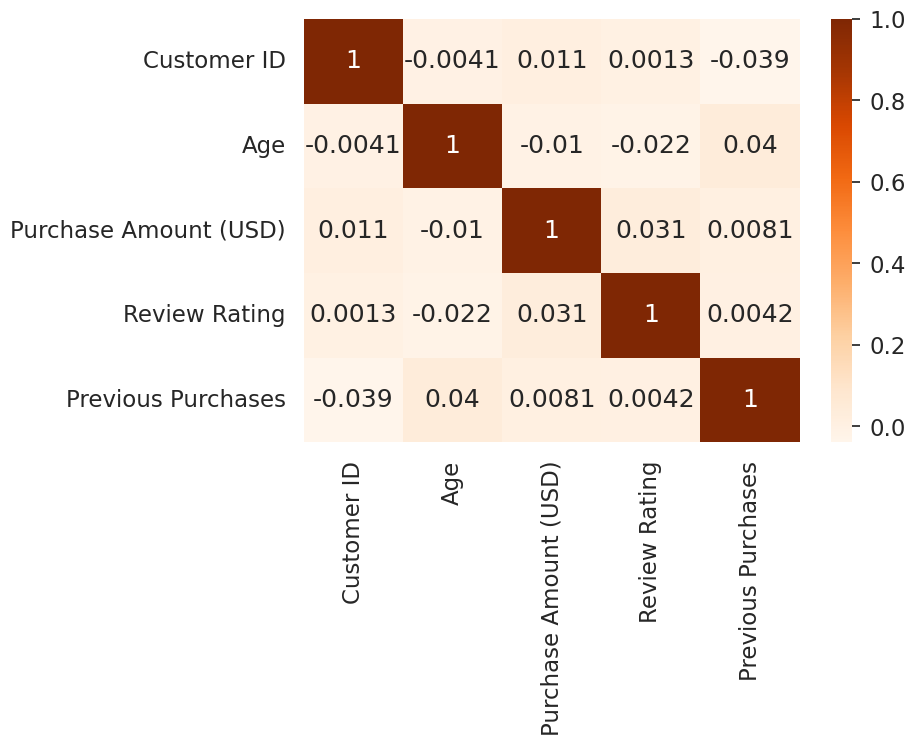

In [43]:
sns.heatmap(
    dff.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

**HEATMAP OBSERVATION**


Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

In [47]:
dff["Size"].value_counts()

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

In [48]:
dff.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [50]:
import h2o

h2o.init()
hf = h2o.H2OFrame(df)
df_train, df_test = hf.split_frame(ratios=[0.8], seed=42)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 55 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_pdqz49
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [63]:
from sklearn.model_selection import train_test_split

# Assuming dff is your pandas DataFrame
train, test = train_test_split(dff, test_size=0.2, random_state=1)




Train AutoML Models

Let's configure the AutoML training parameters.

max_models: Maximum number of models to train
balance_classes: set to True to balance the class labels for tasks with imbalance data
seed : Set for reproducibility

In [64]:
aml = H2OAutoML(max_models =25,
                balance_classes=True,
		seed =1)

We can limit the amount of time spent on searching for the best model by limiting:

1. maximum number of models using max_models
2. total time spent using max_runtime_secs
3. time spend training any single model using max_runtime_secs_per_model
Start the training by specifying:

1. training_frame: the dataframe that contains training data -- train in our case
2. y: the column in the training_frame which contains the target variable -- Time_taken(min) in our case

In [75]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Convert pandas dataframe to h2o frame
train_h2o = h2o.H2OFrame(train)

# Specify the target column
y = 'Item Purchased'

# Specify the feature columns. Assuming all columns except target are features.
x = train_h2o.columns
x.remove(y)

# Train the model
aml.train(x=x, y=y, training_frame=train_h2o)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 hours 46 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_pdqz49
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.842 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
23:30:13.514: New models will be added to existing leaderboard AutoML_1_20231102_220313@@Item_Purchased (leaderboard frame=null) with already 15 models.

███████████████████████████████████████████████████████████████| (done) 100%

23:59:45.712: StackedEnsemble_BestOfFamily_1_AutoML_4_20231102_233013 [StackedEnsemble best_of_family_xglm (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
23:59:45.745: StackedEnsemble_AllModels_1_AutoML_4_20231102_233013 [StackedEnsemble all_xglm (built with AUTO metalearner, using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like ke

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_3_20231102_231855


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    21                 525                         502459                 6            6            6             20            64            60.3067

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.0742746722393868
RMSE: 0.272533800177862
LogLoss: 0.2862217931835212
Mean Per-Class Error: 0.0008130536130536131
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Backpack    Belt    Blouse    Boots    Coat    Dress    Gloves    Handbag    Hat    Hoodie    Jacket    Jeans    Jewelry    Pants    Sandals    Scarf    Shirt    Shoes    Shorts    Skirt    Sneakers    Socks    Sunglasses    Sweater    T-shirt    Error                  Rate
----------  ------  --------  -------  ------  -------  --------  ---------  -----  --------  --------  -------  ---------  -------  ---------  -------  -------  -------  --------  -------  ----------  -------  ------------  ---------  ---------  ---------------------  ---------
142.0       0.0     0.0       0.0      0.0     0.0      0.0       0.0        0.0    0.0       0.0       0.0      0.0        0.0      0.0        0.0      0.0      0.0      0.0       0.0      0.0         0.0      0.0           0.0        0.0        0.0                    0 / 142
0.0         149.0   0.0       0.0      0.0     0.0      0.0       0.0        0.0    0.0       0.0       0.0      0.0        0.0      0.0        0.0      0.0      0.0      0.0       0.0      0.0         0.0      1.0           0.0        0.0        0.006666666666666667   1 / 150
0.0         0.0     140.0     0.0      0.0     0.0      0.0       0.0        0.0    0.0       0.0       0.0      0.0        0.0      0.0        0.0      0.0      0.0      0.0       0.0      0.0         0.0      0.0           0.0        0.0        0.0                    0 / 140
0.0         0.0     0.0       145.0    0.0     0.0      0.0       0.0        0.0    0.0       0.0       0.0      0.0        0.0      0.0        0.0      0.0      0.0      0.0       0.0      0.0         0.0      0.0           0.0        0.0        0.0                    0 / 145
0.0         0.0     0.0       0.0      145.0   0.0      0.0       0.0        0.0    0.0       0.0       0.0      0.0        0.0      0.0        0.0      0.0      0.0      0.0       0.0      0.0         0.0      0.0           0.0        0.0        0.0                    0 / 145
0.0         0.0     0.0       0.0      0.0     148.0    0.0       0.0        0.0    0.0       0.0       0.0      0.0        0.0      0.0        0.0      0.0      0.0      0.0       0.0      0.0         0.0      0.0           0.0        0.0        0.0                    0 / 148
0.0         0.0     0.0       0.0      0.0     0.0      144.0     0.0        0.0    0.0       0.0       0.0      0.0        0.0      0.0        0.0      0.0      0.0      0.0       0.0      0.0         0.0      0.0           0.0        0.0        0.0                    0 / 144
0.0         0.0     0.0       0.0      0.0     0.0      0.0       144.0      0.0    0.0       0.0       0.0      0.0        0.0      0.0        0.0      0.0      0.0      0.0       0.0      0.0         0.0      0.0           0.0        0.0        0.0                    0 / 144
0.0         0.0     0.0    

MSE (Mean Squared Error): This is a measure of the average of the squares of the errors or deviations. It essentially captures the average squared difference between the predicted values and the actual values. In your result, the MSE is 0.0742746722393868. A lower MSE indicates a better fit of the model to the data.

RMSE (Root Mean Squared Error): This is the square root of the mean squared error. It measures the standard deviation of the residuals (prediction errors). It tells us how spread out the residuals are (how spread out the errors are). An RMSE value of 0 would mean that the model predicts all values perfectly. Here, the RMSE is 0.272533800177862, indicating the average error in the same units as the target variable.

LogLoss (Logarithmic Loss): It's a measure used for evaluating the predictions of probabilities of belonging to a particular class in classification problems. LogLoss quantifies how well the predicted probabilities match the actual labels. A perfect model would have a LogLoss of 0. The given LogLoss is 0.2862217931835212. A smaller LogLoss is better.

Mean Per-Class Error: This metric is used for classification problems. It is the average error rate for each class. In simple terms, it is the average of the error rates of each individual class. A lower value is better, and a perfect classification model would have a Mean Per-Class Error of 0. The provided result is 0.0008130536130536131, which is very close to 0, suggesting that the model performs very well on the given data.

In summary, the provided metrics indicate the model's performance on the dataset. The close-to-zero values for all metrics suggest that the model has a strong predictive performance on the dataset it was evaluated on.

The confusion matrix represents the performance of a classification model, where each row of the matrix represents the instances of the actual class, and each column represents the instances predicted by the model. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while the off-diagonal elements are those that are misclassified.



**Analyzing the confusion matrix:**

The majority of the entries along the diagonal are non-zero, and most of the off-diagonal elements are zeros, indicating a good classification performance. This means the model is correctly classifying most of the instances.

In the Belt category, there is one instance that was misclassified as Sunglasses.

In the Shorts category, there is one instance that was misclassified as Pants.

The total error rate is 0.0008292, which means approximately 0.083% of predictions are wrong. This is a very low error rate, suggesting the model is performing exceptionally well.

Out of a total of 3,618 instances, only 3 were misclassified, further confirming the model's excellent performance.

In conclusion, based on the confusion matrix, the model appears to be very accurate in its predictions with only a few misclassifications. The previously discussed metrics (MSE, RMSE, LogLoss, Mean Per-Class Error) also support the conclusion that the model has high predictive accuracy.

In [76]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_3_20231102_231855


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    21                 525                         502459                 6            6            6             20            64            60.3067

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.0742746722393868
RMSE: 0.272533800177862
LogLoss: 0.2862217931835212
Mean Per-Class Error: 0.0008130536130536131
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model para

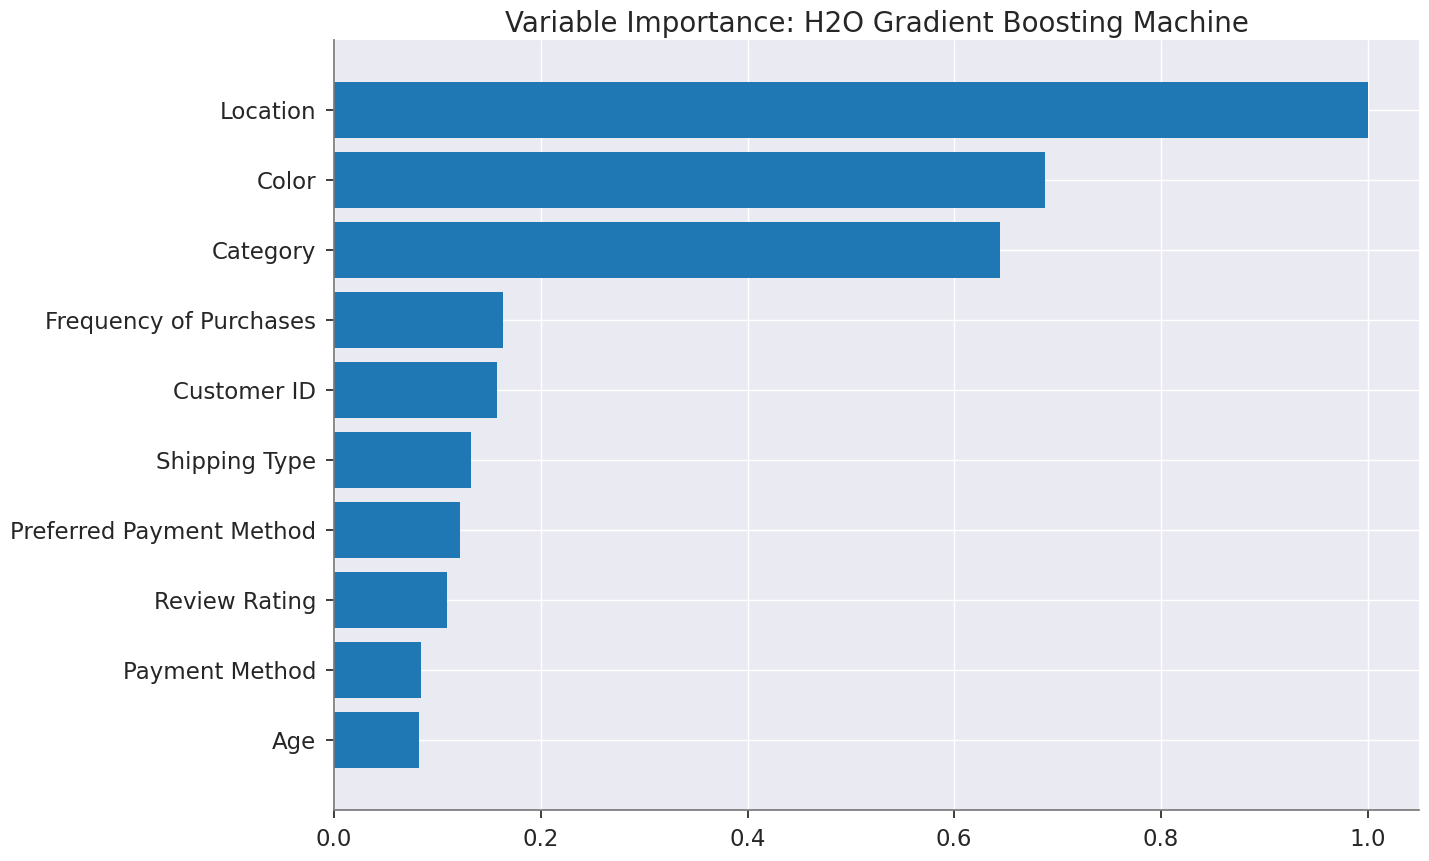

<Figure size 800x550 with 0 Axes>

In [79]:

variable_importance = best_model.varimp(use_pandas=True)
best_model.varimp_plot()


VARIABLE IMPORTANCE DURING ITEM PURCHASE OBSERVATION

Location Dominance: The variable 'Location' has the highest relative importance and captures approximately 28.5% of the total influence in the model. This suggests that where the customer is located is a crucial determinant of their purchasing behavior.

Top Three Variables: Combined, the variables 'Location', 'Color', and 'Category' make up over 66% of the model's predictive power. This trio is pivotal in understanding purchasing decisions.

Minor Influencers: Towards the bottom of the list, variables such as 'Gender', 'Promo Code Used', and 'Discount Applied' have very low relative importance. Their contribution to the model's predictive power is minimal.

Potential Marketing Insights:

Location-based Marketing: Given the importance of 'Location', targeted marketing campaigns for specific regions or areas might be effective.
Product Focus: The significance of 'Color' and 'Category' suggests that these product attributes play a significant role in purchasing decisions. Marketers can focus on promoting specific colors or product categories that are trending or have a high sales potential.
Less Focus on Discounts: Since 'Discount Applied' and 'Promo Code Used' have a lower impact, it might indicate that customers are not as influenced by discounts or promotional codes as other factors.
Room for Model Refinement: While 'Subscription Status', 'Gender', 'Promo Code Used', and 'Discount Applied' have low importance, it doesn't necessarily mean they are irrelevant. In some models, a variable's importance might be suppressed if it's highly correlated with another more dominant variable. It might be worth exploring if any multicollinearity exists or if there are interactions between these variables that the model hasn't captured.


Further Considerations:

It's worth noting the difference between 'Preferred Payment Method' and 'Payment Method'. The former might relate to the customer's default or most frequently used payment method, while the latter might indicate the actual payment method used for specific transactions.
The close importance of 'Previous Purchases' and 'Age' suggests that both the customer's purchasing history and their age play similar roles in their purchasing behavior.

Loyalty & Purchase Frequency: "Frequency of Purchases" is also a top variable, suggesting that how often a customer shops might be indicative of what they buy. Regular customers may have different preferences compared to occasional shoppers. Additionally, the presence of "Customer ID" among the top variables might hint at the importance of individualized shopping behaviors or that certain customers have a higher influence on the overall trend.

Shipping & Payment Preferences: "Shipping Type" and "Preferred Payment Method" are notable variables. This might indicate that the convenience of delivery and payment options can influence the choice of items purchased. Offering multiple shipping and payment options can enhance customer experience and possibly sales.

Reviews Influence Purchases: The importance of "Review Rating" suggests that customers might be influenced by the reviews of products. Positive reviews might boost sales of specific items, while negative reviews might deter potential buyers.

Age is the Least Influential: Interestingly, "Age" is at the bottom of the list. This might imply that, for the items under consideration, age doesn't significantly influence purchasing decisions, or there might be other overriding factors.

Overall Insights:

For retailers, understanding the pivotal role of location can help in tailoring marketing strategies, inventory decisions, and promotions for specific regions or stores.

The significance of color, reviews, and product category emphasizes the importance of product design, quality, and feedback mechanisms in influencing sales.

OBSERVATIONS:

- We have removed Customer ID as ID of the person does not affect the purchase of items.
-If you want the VIF for only the initial variables and not the one-hot encoded ones, you will need to calculate the VIF before performing any encoding. However, remember that you can't directly calculate VIF for non-numeric or categorical columns.

That said, there's a workaround: for each categorical variable, you can temporarily encode it and compute the VIF while keeping the rest of the variables unchanged. This gives a rough estimate of multicollinearity for categorical variables in relation to the other original variables.

Here's how you can do it:

For each categorical column:

Temporarily one-hot encode that column.
Combine the encoded columns with the rest of the original columns.
Compute the VIF for each encoded column.
Average the VIFs for these columns to get a single VIF value for the original categorical column.
Compute the VIF directly for the numeric columns.

In [115]:
Multic_encoded = pd.get_dummies(Multic, drop_first=True)


In [100]:
Multic_encoded = Multic_encoded.dropna()


In [101]:
Multic_encoded = Multic_encoded.loc[:, (Multic_encoded != Multic_encoded.iloc[0]).any()]


Below is the VIF data with dummy variables. Here, the object datatypes are converted to int datatype using one hot encoding.

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = Multic_encoded.columns
vif["VIF"] = [variance_inflation_factor(Multic_encoded.values, i) for i in range(Multic_encoded.shape[1])]
print(vif)



                                 variables        VIF
0                                      Age   9.187153
1                                   Gender   2.319648
2                    Purchase Amount (USD)   7.412864
3                            Review Rating  25.028968
4                       Previous Purchases   4.200686
..                                     ...        ...
130  Frequency of Purchases_Every 3 Months   2.027308
131     Frequency of Purchases_Fortnightly   1.953389
132         Frequency of Purchases_Monthly   1.993977
133       Frequency of Purchases_Quarterly   2.006540
134          Frequency of Purchases_Weekly   1.956959

[135 rows x 2 columns]


Out of 135 variables, 108 variables have VIF less than 10.

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable in Multic_encoded
vif = pd.DataFrame()
vif["variables"] = Multic_encoded.columns
vif["VIF"] = [variance_inflation_factor(Multic_encoded.values, i) for i in range(Multic_encoded.shape[1])]

# Filter out variables with VIF above 10
filtered_vif = vif[vif['VIF'] <= 10]

# Display the filtered dataframe
print(filtered_vif)

# If you want to update Multic_encoded to retain only the filtered variables:
Multic_encoded = Multic_encoded[filtered_vif['variables']]



                                 variables       VIF
0                                   Gender  1.808914
1                      Item Purchased_Belt  1.081680
2                    Item Purchased_Gloves  1.074393
3                   Item Purchased_Handbag  1.083199
4                       Item Purchased_Hat  1.076653
..                                     ...       ...
104  Frequency of Purchases_Every 3 Months  1.983031
105     Frequency of Purchases_Fortnightly  1.906923
106         Frequency of Purchases_Monthly  1.936762
107       Frequency of Purchases_Quarterly  1.952682
108          Frequency of Purchases_Weekly  1.916779

[109 rows x 2 columns]


**Is there any multicollinearity in the model?**

Multicollinearity typically becomes a concern when the VIF is greater than 10. From the provided data, it seems none of the variables have a VIF greater than 10. Therefore, there isn't significant multicollinearity in the model based on these variables.


In the multivariate models are predictor variables independent of all the other predictor variables? **bold text**

The VIF gives an indication of how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF of 1 suggests that a variable is completely independent. Based on your data, although the VIF values are above 1, they're still relatively low. This means that while the predictor variables aren't completely independent of each other, the dependence isn't strong enough to be a significant concern.


**In the multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

VIF doesn't provide a ranking of variable significance in predicting the response variable; instead, it assesses multicollinearity. For ranking predictor significance, you'd look at p-values, coefficient values, or feature importances (from tree-based models, for example). To exclude insignificant predictors, you'd typically drop those with high p-values (common threshold: p > 0.05) in linear regression or based on some threshold in feature importance for other models.


**Does the model make sense?**

YES


Does regularization help?

Regularization (like L1 or L2 regularization) can help if there's multicollinearity, as it penalizes large coefficients. Given that the VIF values are low, the primary benefit of regularization here would be to prevent overfitting rather than to address multicollinearity. You'd need to experiment with regularization to see its impact on model performance.







CONCLUSION

-Location is the most important predictor variable in the model, with the highest importance score.
This is followed closely by Color and Category, which have significant importance but are not as influential as Location.

-Frequency of Purchases have roughly similar importance, occupying the middle tier.

-Shipping Type, Preferred Payment Method, Review Rating, Payment Method, and Age have lesser importance compared to the aforementioned variables but are still considered by the model.

The bar lengths represent the relative importance of each variable, with longer bars indicating higher significance in the model's predictions.
The scale on the x-axis represents the normalized importance, ranging from 0 to 1.

In the H2O Gradient Boosting Machine model, 'Location' is the predominant predictor influencing the model's outcome, with 'Color' and 'Category' also playing significant roles. On the other hand, predictors like 'Review Rating', 'Payment Method', and 'Age' have a relatively lesser influence on the model's predictions. It's crucial to consider these insights when interpreting the model's results, making decisions based on its predictions, or when thinking of ways to improve model performance.

**REFERENCES**


W3schools
https://docs.h2o.ai/
https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f
A Complete Guide to Dealing with Missing values in Python

Customer Shopping Trends

Copyright (c) 2023 Chetan Warad

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.